In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from IPython.display import JSON

# Setup seaborn styling
sns.set()

In [115]:
api = requests.get("https://api.rootnet.in/covid19-in/stats/latest")
api.status_code

200

In [116]:
result = json.loads(api.text)
result = JSON(result)

# Show data
result=result.data["data"]
result

{'summary': {'total': 17313163,
  'confirmedCasesIndian': 17313115,
  'confirmedCasesForeign': 48,
  'discharged': 14304382,
  'deaths': 195123,
  'confirmedButLocationUnidentified': 0},
 'unofficial-summary': [{'source': 'covid19india.org',
   'total': 7945975,
   'recovered': 7198877,
   'deaths': 119538,
   'active': 626192}],
 'regional': [{'loc': 'Andaman and Nicobar Islands',
   'confirmedCasesIndian': 5665,
   'confirmedCasesForeign': 0,
   'discharged': 5467,
   'deaths': 66,
   'totalConfirmed': 5665},
  {'loc': 'Andhra Pradesh',
   'confirmedCasesIndian': 1033560,
   'confirmedCasesForeign': 0,
   'discharged': 936143,
   'deaths': 7685,
   'totalConfirmed': 1033560},
  {'loc': 'Arunachal Pradesh',
   'confirmedCasesIndian': 17607,
   'confirmedCasesForeign': 0,
   'discharged': 16968,
   'deaths': 58,
   'totalConfirmed': 17607},
  {'loc': 'Assam',
   'confirmedCasesIndian': 237533,
   'confirmedCasesForeign': 0,
   'discharged': 219516,
   'deaths': 1200,
   'totalConfirmed

In [117]:
result_dict = dict(result)
columns = ["loc", "confirmedCasesIndian", "confirmedCasesForeign",
           "discharged", "deaths", "totalConfirmed"]
covid = pd.DataFrame(result_dict["regional"], columns=columns)
covid.head()

,loc,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed
0,Andaman and Nicobar Islands,5665,0,5467,66,5665
1,Andhra Pradesh,1033560,0,936143,7685,1033560
2,Arunachal Pradesh,17607,0,16968,58,17607
3,Assam,237533,0,219516,1200,237533
4,Bihar,403596,0,314286,2155,403596


In [118]:
# Get top 5 states having most number of confirmed cases
top_5_states = covid.sort_values(by="totalConfirmed",ascending=False)[:5]
top_5_states

,loc,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed
20,Maharashtra,4295024,3,3530060,64760,4295027
16,Kerala,1405647,8,1181324,5110,1405655
15,Karnataka,1339201,0,1062594,14426,1339201
34,Uttar Pradesh,1086624,1,777844,11165,1086625
30,Tamil Nadu,1081982,6,963251,13557,1081988


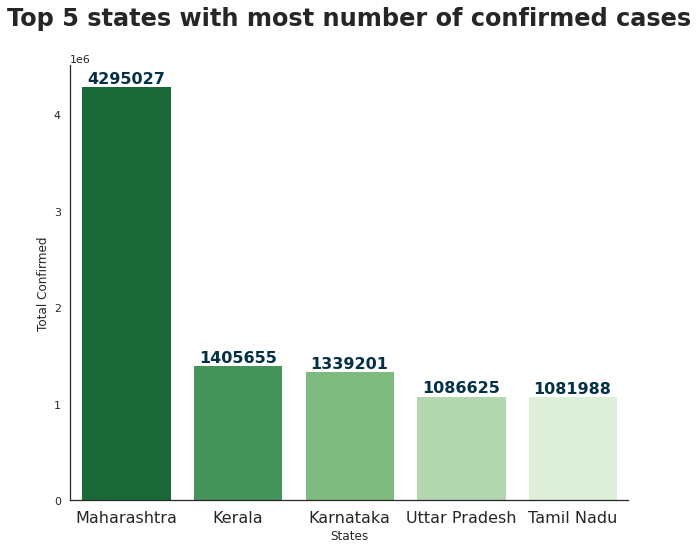

In [119]:
# Plot top 5 States having most number of confirmed cases
plt.figure(figsize=(10, 8))
sns.set_style("white")
color_palette = sns.color_palette("Greens",
                                  as_cmap=True)
barplot = sns.barplot(x="loc", y="totalConfirmed",
                      data=top_5_states, palette="Greens_r")
plt.xticks(fontsize=16)
plt.xlabel("States")
plt.ylabel("Total Confirmed")
plt.title("Top 5 states with most number of confirmed cases",
          fontsize=24, fontweight="bold",pad=40)
sns.despine()
for p in barplot.patches:
    barplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                     ha='center', va='bottom',
                     color='#023047', fontsize=16, fontweight='bold')

In [120]:
top_5_states_with_deaths = covid.sort_values(by="deaths",ascending=False)[:5]
top_5_states_with_deaths

,loc,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed
20,Maharashtra,4295024,3,3530060,64760,4295027
15,Karnataka,1339201,0,1062594,14426,1339201
8,Delhi,1027714,1,918875,14248,1027715
30,Tamil Nadu,1081982,6,963251,13557,1081988
34,Uttar Pradesh,1086624,1,777844,11165,1086625


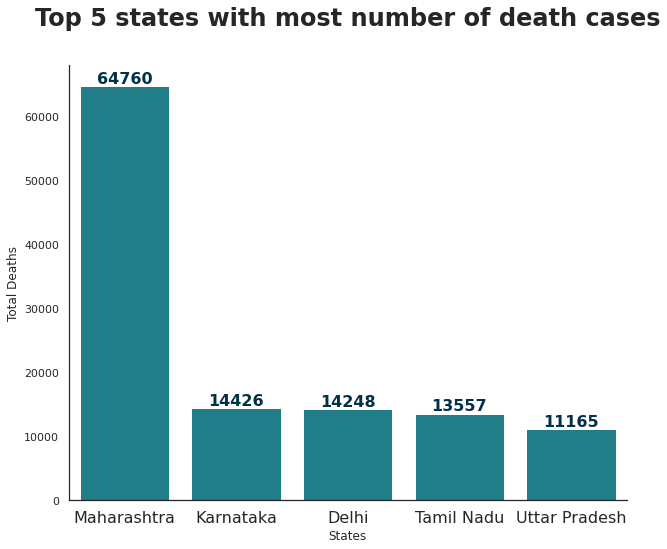

In [121]:
# Plot top 5 States having most number of confirmed cases
plt.figure(figsize=(10, 8))
sns.set_style("white")
color_palette = sns.color_palette("Greens",
                                  as_cmap=True)
barplot_deaths = sns.barplot(x="loc", y="deaths",
                      data=top_5_states_with_deaths, color="#108A99")
plt.xticks(fontsize=16)
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.title("Top 5 states with most number of death cases",
          fontsize=24, fontweight="bold",pad=40)
sns.despine()
for p in barplot_deaths.patches:
    barplot_deaths.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                     ha='center', va='bottom',
                     color='#023047', fontsize=16, fontweight='bold')

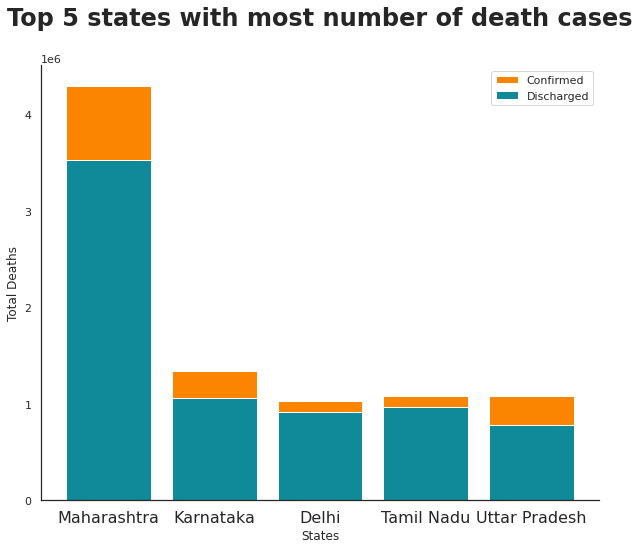

In [122]:
# Plot top 5 States having most number of confirmed cases and number of discharged
plt.figure(figsize=(10, 8))
sns.set_style("white")
color_palette = sns.color_palette("Greens",
                                  as_cmap=True)
barplot_deaths = plt.bar(top_5_states_with_deaths["loc"],top_5_states_with_deaths["totalConfirmed"], color="#fb8500")
plt.bar(top_5_states_with_deaths["loc"],top_5_states_with_deaths["discharged"], color="#108A99")
plt.xticks(fontsize=16)
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.title("Top 5 states with most number of death cases",
          fontsize=24, fontweight="bold",pad=40)
plt.legend(labels=["Confirmed","Discharged"])
sns.despine()
plt.show()

In [123]:
covid_daily=requests.get("https://api.covid19india.org/data.json")
covid_daily.status_code

200

In [124]:
result = json.loads(covid_daily.text)
result = JSON(result)
result=result.data
result_dict = dict(result)
columns = ["dailyconfirmed", "dailydeceased", "dailyrecovered",
           "date", "dateymd", "totalconfirmed","totaldeceased","totalrecovered"]
covid_daily = pd.DataFrame(result_dict["cases_time_series"], columns=columns)
covid_daily.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January 2020,2020-01-30,1,0,0
1,0,0,0,31 January 2020,2020-01-31,1,0,0
2,0,0,0,1 February 2020,2020-02-01,1,0,0
3,1,0,0,2 February 2020,2020-02-02,2,0,0
4,1,0,0,3 February 2020,2020-02-03,3,0,0


In [125]:
covid_daily.drop("date",axis=1,inplace=True)
covid_daily.rename(columns={"dateymd":"date"},inplace=True)
covid_daily[306:336]

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
306,36474,501,43208,2020-12-01,9499652,137569,8931636
307,35506,526,40908,2020-12-02,9535158,138095,8972544
308,36574,541,42991,2020-12-03,9571732,138636,9015535
309,36711,511,42359,2020-12-04,9608443,139147,9057894
310,36010,482,41885,2020-12-05,9644453,139629,9099779
311,33178,390,39078,2020-12-06,9677631,140019,9138857
312,26227,386,39293,2020-12-07,9703858,140405,9178150
313,32083,402,36583,2020-12-08,9735941,140807,9214733
314,31637,413,37693,2020-12-09,9767578,141220,9252426
315,29411,411,37707,2020-12-10,9796989,141631,9290133


In [134]:
covid_daily["dailyconfirmed"]=pd.to_numeric(covid_daily["dailyconfirmed"])
covid_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dailyconfirmed  452 non-null    int64 
 1   dailydeceased   452 non-null    object
 2   dailyrecovered  452 non-null    object
 3   date            452 non-null    object
 4   totalconfirmed  452 non-null    object
 5   totaldeceased   452 non-null    object
 6   totalrecovered  452 non-null    object
dtypes: int64(1), object(6)
memory usage: 24.8+ KB


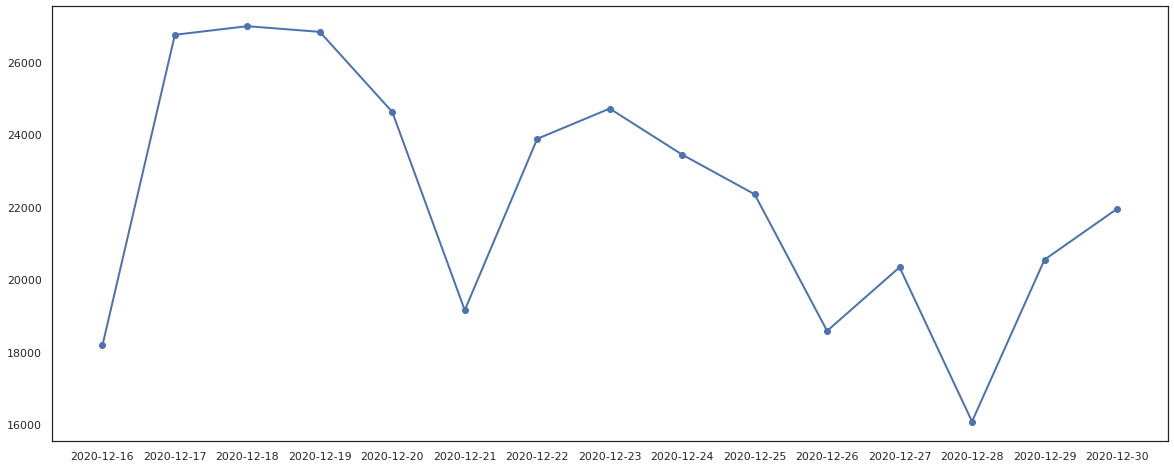

In [135]:
x,y=321,336
days=covid_daily["date"][x:y]
number_of_patients=covid_daily["dailyconfirmed"][x:y]
plt.figure(figsize=(20, 8))
plt.plot(days,number_of_patients,marker="o",linewidth=2)
plt.show()